# FatemehVahabi-4013614052-Q3

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)

x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

170498071/170498071 [==============================] - 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
1563/1563 [==============================] - 18s 6ms/step - loss: 1.5802 - accuracy: 0.4272 - val_loss: 1.3395 - val_accuracy: 0.5168
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2725 - accuracy: 0.5477 - val_loss: 1.1920 - val_accuracy: 0.5801
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1170 - accuracy: 0.6058 - val_loss: 1.0784 - val_accuracy: 0.6211
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0049 - accuracy: 0.6473 - val_loss: 0.9965 - val_accuracy: 0.6550
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.9590 - accuracy: 0.6659
Test loss: 0.9590486288070679
Test accuracy: 0.6658999919891357


## with dropout

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)

x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7174 - accuracy: 0.3743 - val_loss: 1.4283 - val_accuracy: 0.4846
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4026 - accuracy: 0.4972 - val_loss: 1.2737 - val_accuracy: 0.5430
Epoch 3/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2658 - accuracy: 0.5501 - val_loss: 1.1908 - val_accuracy: 0.5738
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1666 - accuracy: 0.5888 - val_loss: 1.0737 - val_accuracy: 0.6243
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.0350 - accuracy: 0.6347
Test loss: 1.0349977016448975
Test accuracy: 0.6347000002861023


## with data augmentation

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)

x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test, num_classes=10)

# define image data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# fit the generator on the data
datagen.fit(x_train)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# define batch size
batch_size = 32

# fit the model on the augmented data
history2 = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train) / batch_size,
                    epochs=5,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1562/1562 [==============================] - 36s 23ms/step - loss: 1.6735 - accuracy: 0.3961 - val_loss: 1.3691 - val_accuracy: 0.5160
Epoch 2/5
1562/1562 [==============================] - 35s 22ms/step - loss: 1.3955 - accuracy: 0.5000 - val_loss: 1.2729 - val_accuracy: 0.5387
Epoch 3/5
1562/1562 [==============================] - 35s 22ms/step - loss: 1.2730 - accuracy: 0.5481 - val_loss: 1.1747 - val_accuracy: 0.5953
Epoch 4/5
1562/1562 [==============================] - 35s 22ms/step - loss: 1.1709 - accuracy: 0.5851 - val_loss: 1.0357 - val_accuracy: 0.6331
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.0475 - accuracy: 0.6330
Test loss: 1.04751455783844
Test accuracy: 0.6330000162124634


## with dropout and data augmentation

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = to_categorical(y_train, num_classes=10)

x_test = x_test.astype('float32') / 255
y_test = to_categorical(y_test, num_classes=10)

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(x_train)

# Define simple convolutional neural network with dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile model with Adam optimizer and categorical crossentropy loss
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history3 = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9086 - accuracy: 0.2901 - val_loss: 1.5790 - val_accuracy: 0.4328
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6613 - accuracy: 0.3864 - val_loss: 1.4549 - val_accuracy: 0.4679
Epoch 3/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.5574 - accuracy: 0.4275 - val_loss: 1.3828 - val_accuracy: 0.4973
Epoch 4/5
1563/1563 [==============================] - 37s 24ms/step - loss: 1.4826 - accuracy: 0.4619 - val_loss: 1.3902 - val_accuracy: 0.4972
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2306 - accuracy: 0.5584
Test loss: 1.2305985689163208
Test accuracy: 0.5583999752998352


## VGG16

In [5]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

x = Flatten()(vgg16_base.output)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=x)

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history4 = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

58889256/58889256 [==============================] - 4s 0us/step
Epoch 1/5
1563/1563 [==============================] - 18s 11ms/step - loss: 13.6182 - accuracy: 0.2676 - val_loss: 8.4915 - val_accuracy: 0.3624
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 6.9344 - accuracy: 0.4046 - val_loss: 5.7395 - val_accuracy: 0.4341
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 4.9533 - accuracy: 0.4550 - val_loss: 4.3962 - val_accuracy: 0.4688
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 3.8249 - accuracy: 0.4883 - val_loss: 3.5212 - val_accuracy: 0.4887
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 2.8978 - accuracy: 0.5063
Test loss: 2.897801399230957
Test accuracy: 0.5062999725341797


## VGG16 with dropout

In [6]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

x = Flatten()(vgg16_base.output)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=x)

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history5 = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5
1563/1563 [==============================] - 17s 10ms/step - loss: 26.4561 - accuracy: 0.1985 - val_loss: 9.4069 - val_accuracy: 0.3758
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 13.9369 - accuracy: 0.3160 - val_loss: 6.0290 - val_accuracy: 0.4571
Epoch 3/5
1563/1563 [==============================] - 16s 10ms/step - loss: 8.6368 - accuracy: 0.3769 - val_loss: 4.1021 - val_accuracy: 0.4998
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 5.6139 - accuracy: 0.4082 - val_loss: 2.8172 - val_accuracy: 0.5223
Epoch 5/5
313/313 [==============================] - 3s 9ms/step - loss: 2.0468 - accuracy: 0.5388
Test loss: 2.0468356609344482
Test accuracy: 0.5388000011444092


## VGG16 with data augmentation

In [7]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoding format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(x_train)

# Load VGG16 model pre-trained on ImageNet
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in vgg16_base.layers:
    layer.trainable = False

# Add output layer with 10 neurons and softmax activation for 10 CIFAR classes
x = Flatten()(vgg16_base.output)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=x)

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history6 = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5
1563/1563 [==============================] - 40s 25ms/step - loss: 13.8794 - accuracy: 0.2349 - val_loss: 9.1498 - val_accuracy: 0.3359
Epoch 2/5
1563/1563 [==============================] - 39s 25ms/step - loss: 7.4674 - accuracy: 0.3472 - val_loss: 6.3595 - val_accuracy: 0.3999
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 5.4903 - accuracy: 0.3897 - val_loss: 4.8280 - val_accuracy: 0.4399
Epoch 4/5
1563/1563 [==============================] - 38s 25ms/step - loss: 4.2344 - accuracy: 0.4161 - val_loss: 3.7422 - val_accuracy: 0.4601
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 2.9716 - accuracy: 0.4769
Test loss: 2.9716150760650635
Test accuracy: 0.47690001130104065


## VGG16 with dropout and data augmentation

In [8]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert labels to one-hot encoding format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(x_train)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze weights of lower layers in VGG16 network
for layer in vgg16_base.layers:
    layer.trainable = False

# Add output layer with 10 neurons (for 10 classes in CIFAR-10) and softmax activation
x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=x)

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history7 = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=5,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/5
1563/1563 [==============================] - 41s 26ms/step - loss: 9.5186 - accuracy: 0.2845 - val_loss: 2.5278 - val_accuracy: 0.4500
Epoch 2/5
1563/1563 [==============================] - 40s 26ms/step - loss: 2.7509 - accuracy: 0.3288 - val_loss: 1.6968 - val_accuracy: 0.4536
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9730 - accuracy: 0.3618 - val_loss: 1.5430 - val_accuracy: 0.4850
Epoch 4/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.7717 - accuracy: 0.3974 - val_loss: 1.4479 - val_accuracy: 0.5086
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 1.3836 - accuracy: 0.5265
Test loss: 1.3836040496826172
Test accuracy: 0.5264999866485596


## plot the result

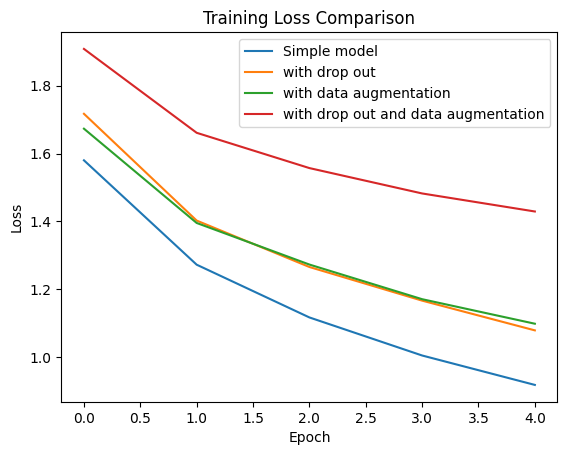

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])

plt.title('Training Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Simple model','with drop out','with data augmentation','with drop out and data augmentation'], loc='upper right')
plt.show()

 عدم استفاده از دراپ اوت و دیتا اگمنتیشن می تواند لاس کمتری را ایجاد کند.

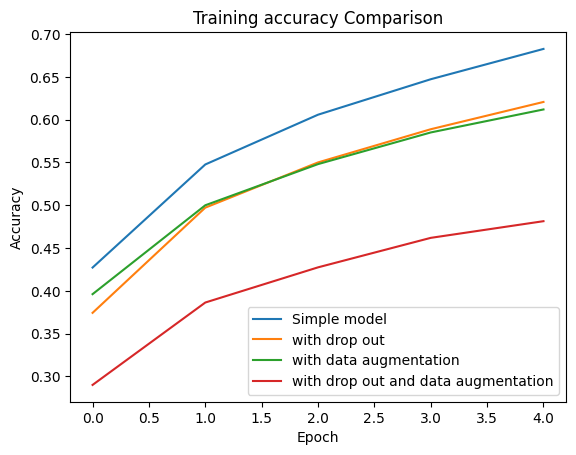

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.title('Training accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Simple model','with drop out','with data augmentation','with drop out and data augmentation'], loc='lower right')
plt.show()

عدم استفاده از دیتا اگمنتیشن و دراپ اوت دقت دسته بندی بالاتری را نیز داراست. همانطور که میبینیم نمودار ها شبیه هم هستند یعنی روند  تغییرات یکسان است.

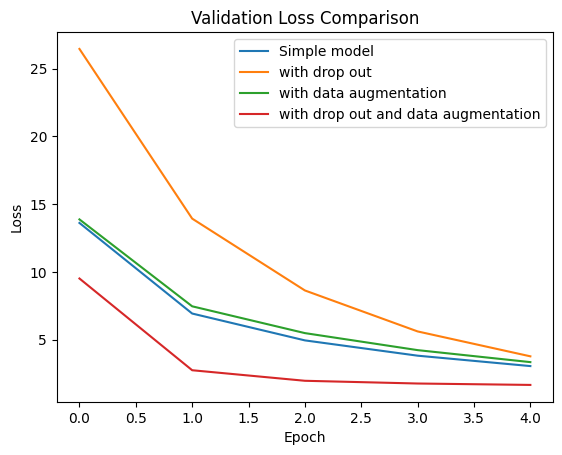

In [11]:
plt.plot(history4.history['loss'])
plt.plot(history5.history['loss'])
plt.plot(history6.history['loss'])
plt.plot(history7.history['loss'])

plt.title('Validation Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Simple model','with drop out','with data augmentation','with drop out and data augmentation'], loc='upper right')
plt.show()

با استفاده از شبکه از پیش اموزش دیده استفاده شده استفاده از دراپ اوت و دیتا اگمنتیشن می تواند لاس کمتری را به ما بدهد. اما میبینیم که استفاده از دراپ اوت سیر بهبود قوی تری را داشته است و در نهایت میزان لاس نزدیک به بقیه حالات بوده است.

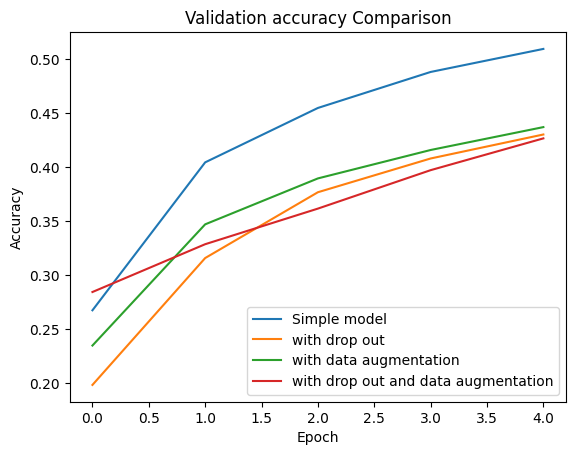

In [12]:
plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])
plt.plot(history7.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Simple model','with drop out','with data augmentation','with drop out and data augmentation'], loc='lower right')
plt.show()

استفاده از شبکه از پیش اموزش دیده بدون دیتا اگمنتیشن و دراپ اوت می تواند دقت دسته بندی بالاتری را به ما بدهدو اما با اختلاف زیادی از سایرین دقت بهتری را.

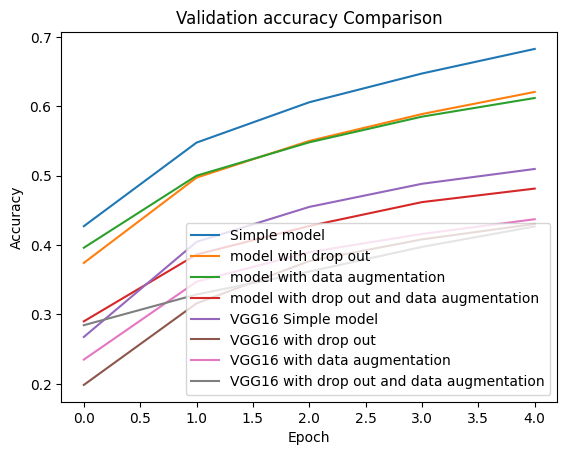

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history3.history['accuracy'])

plt.plot(history4.history['accuracy'])
plt.plot(history5.history['accuracy'])
plt.plot(history6.history['accuracy'])
plt.plot(history7.history['accuracy'])

plt.title('Validation accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Simple model','model with drop out','model with data augmentation','model with drop out and data augmentation','VGG16 Simple model','VGG16 with drop out','VGG16 with data augmentation','VGG16 with drop out and data augmentation'], loc='lower right')
plt.show()


نمودار بالا نشان میدهد که استفاده از مدل معمولی که خودمان نوشتیم دقت دسته بندی بالاتری دارد. و همین مدل را هم باید بدون دراپ اوت و دیتا اگمنتیشن استفاده کنیم تا دقت بالاتری را به دست اوریم.